## Análise de dados do Strava e de clima com Python
#### Passos realizados:
* Autenticação e coleta dos dados da minha conta no Strava via API
* Tratamento e limpeza de colunas desnecessárias
* Autenticação e coleta dos dados de clima da API Visual Crossing
* Tratamento e limpeza dos dados
* Fusão dos dados do Strava e de clima
* Exportação dos dados em csv
* Análise estatística básica
* Visualização dos dados

In [336]:
# importando as bibliotecas
from stravalib.client import Client
import pandas as pd
from os.path import join
import requests
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib as plt

In [261]:
# definindo os dados para autenticação na API do Strava
client_id = '109706'
client_secret = 'dd0f89e9187b429e181535ff8e2b0eb571949702'

# abrir essa URL no navegador, logar no strava e autorizar, ele vai direcionar para uma página em branco, na URL dessa pagina terá um "code"
# copiar o code encontrado na url e definir a variável da próxima célula
url = 'https://www.strava.com/oauth/authorize?client_id=109706&redirect_uri=http://localhost&response_type=code&scope=activity:read_all'

In [262]:
code = 'a30fda59c24f14ee52471af8a7de95ad5d33d0b0'

In [263]:
post = requests.post(f'https://www.strava.com/oauth/token?client_id={client_id}&client_secret={client_secret}&code={code}&grant_type=authorization_code')
post.status_code

200

In [264]:
post.json()

{'token_type': 'Bearer',
 'expires_at': 1711682097,
 'expires_in': 21600,
 'refresh_token': '4715627e89cbd2414c9cb8491687edbcf9c1ae3d',
 'access_token': '137c2f985a1573aba48f5769efc34a44ea841d7c',
 'athlete': {'id': 22329478,
  'username': 'matheus_gentil',
  'resource_state': 2,
  'firstname': 'Matheus',
  'lastname': 'Gentil',
  'bio': '',
  'city': '',
  'state': '',
  'country': None,
  'sex': 'M',
  'premium': True,
  'summit': True,
  'created_at': '2017-05-30T19:23:03Z',
  'updated_at': '2024-03-28T15:30:31Z',
  'badge_type_id': 1,
  'weight': None,
  'profile_medium': 'https://graph.facebook.com/10159066150795393/picture?height=256&width=256',
  'profile': 'https://graph.facebook.com/10159066150795393/picture?height=256&width=256',
  'friend': None,
  'follower': None}}

In [265]:
# obtendo o token de acesso
access_token = post.json()['access_token']

In [266]:
# instanciando o objeto que acessa os dados
client = Client(access_token=access_token)

In [267]:
# obtendo os dados da API
activities = client.get_activities()
sample = list(activities)[0]


In [268]:
sample.to_dict()

{'id': 11054848479,
 'achievement_count': 0,
 'athlete': {'id': 22329478,
  'city': None,
  'country': None,
  'created_at': None,
  'firstname': None,
  'lastname': None,
  'premium': None,
  'profile': None,
  'profile_medium': None,
  'resource_state': 1,
  'sex': None,
  'state': None,
  'summit': None,
  'updated_at': None,
  'bikes': None,
  'clubs': None,
  'follower_count': None,
  'friend_count': None,
  'ftp': None,
  'measurement_preference': None,
  'shoes': None,
  'weight': None,
  'is_authenticated': None,
  'athlete_type': None,
  'friend': None,
  'follower': None,
  'approve_followers': None,
  'badge_type_id': None,
  'mutual_friend_count': None,
  'date_preference': None,
  'email': None,
  'super_user': None,
  'email_language': None,
  'max_heartrate': None,
  'username': None,
  'description': None,
  'instagram_username': None,
  'offer_in_app_payment': None,
  'global_privacy': None,
  'receive_newsletter': None,
  'email_kom_lost': None,
  'dateofbirth': None,

In [269]:
# selecionando as colunas que eu quero
cols = ['id', 'name', 'start_date_local', 'type', 'elapsed_time','distance',
        'max_heartrate', 'average_heartrate','average_speed', 'calories', 'max_speed']

In [270]:
# transformando o dicionário em lista
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in cols])

In [271]:
# criando o dataframe dos dados do Strava
df_strava = pd.DataFrame(data, columns=cols)

In [272]:
df_strava.head()

,id,name,start_date_local,type,elapsed_time,distance,max_heartrate,average_heartrate,average_speed,calories,max_speed
0,11054848479,Corrida ao entardecer,2024-03-27 18:09:24,Run,0 days 00:03:38,280.0,103.0,91.2,1.284,None,0.0
1,11054848523,Treinamento com peso vespertino,2024-03-27 17:22:54,WeightTraining,0 days 00:46:20,0.0,117.0,95.3,0.000,None,0.0
2,11034339482,Corrida matinal,2024-03-25 08:14:35,Run,0 days 00:10:00,840.0,125.0,107.8,1.400,None,0.0
3,11034339510,Treinamento com peso matinal,2024-03-25 07:23:11,WeightTraining,0 days 00:51:19,0.0,120.0,97.6,0.000,None,0.0
4,11021283999,Corrida ao entardecer,2024-03-22 20:50:28,Run,0 days 00:24:08,2300.0,172.0,131.3,1.588,None,0.0


In [273]:
# obtendo os tipos de atividade física que tenho registrado na minha conta
df_strava['type'].value_counts()

type
WeightTraining    69
Run               38
Walk              12
Ride               5
Swim               2
Name: count, dtype: int64

In [274]:
# excluindo os dados de natação, pois me lembro que foi apenas um teste do smart watch quando fui na piscina
df_strava = df_strava [~df_strava ['type']. isin (['Swim'])]

In [275]:
# verificando as colunas
df_strava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 125
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   id                 124 non-null    int64          
 1   name               124 non-null    object         
 2   start_date_local   124 non-null    datetime64[ns] 
 3   type               124 non-null    object         
 4   elapsed_time       124 non-null    timedelta64[ns]
 5   distance           124 non-null    float64        
 6   max_heartrate      104 non-null    float64        
 7   average_heartrate  104 non-null    float64        
 8   average_speed      124 non-null    float64        
 9   calories           0 non-null      object         
 10  max_speed          124 non-null    float64        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3), timedelta64[ns](1)
memory usage: 11.6+ KB


In [276]:
# alterando a distancia para km e as velocidade média e máxima para km/h
df_strava['distance'] = (df_strava['distance']/1000).round(2)
df_strava['average_speed'] = (df_strava['average_speed'] * 3.6).round(2)
df_strava['max_speed'] = (df_strava['max_speed'] * 3.6).round(2)

In [277]:
# obtendo apenas os minutos de cada atividade
df_strava['time_min'] = df_strava['elapsed_time'].dt.total_seconds()/60
df_strava['time_min'] = df_strava['time_min'].round(2)

In [278]:
# decidi remover a coluna original do tempo decorrido, a coluna ID da atividade e a de calorias pois está em branco
df_strava.drop(['elapsed_time','id', 'calories'], axis=1, inplace=True)
df_strava.head()

,name,start_date_local,type,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min
0,Corrida ao entardecer,2024-03-27 18:09:24,Run,0.28,103.0,91.2,4.62,0.0,3.63
1,Treinamento com peso vespertino,2024-03-27 17:22:54,WeightTraining,0.00,117.0,95.3,0.00,0.0,46.33
2,Corrida matinal,2024-03-25 08:14:35,Run,0.84,125.0,107.8,5.04,0.0,10.00
3,Treinamento com peso matinal,2024-03-25 07:23:11,WeightTraining,0.00,120.0,97.6,0.00,0.0,51.32
4,Corrida ao entardecer,2024-03-22 20:50:28,Run,2.30,172.0,131.3,5.72,0.0,24.13


In [279]:
# obtendo mais dados relacionados a data da atividade, como horario inicial, mês, dia, ano, dia do ano, dia da semana e formatando a data
df_strava['date'] = pd.to_datetime(df_strava['start_date_local'])
df_strava['start_time'] = df_strava['start_date_local'].dt.time
df_strava['date'] = df_strava['date'].dt.date
df_strava['month'] = df_strava['start_date_local'].dt.month_name()
df_strava['year'] = df_strava['start_date_local'].dt.year
df_strava['year'] = (df_strava['year']).astype(object)
df_strava['dayofyear'] = df_strava['start_date_local'].dt.dayofyear
df_strava['dayofyear'] = pd.to_numeric(df_strava['dayofyear'])
df_strava['weekday'] = df_strava['start_date_local'].dt.day_name()

In [280]:
df_strava.head()

,name,start_date_local,type,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min,date,start_time,month,year,dayofyear,weekday
0,Corrida ao entardecer,2024-03-27 18:09:24,Run,0.28,103.0,91.2,4.62,0.0,3.63,2024-03-27,18:09:24,March,2024,87,Wednesday
1,Treinamento com peso vespertino,2024-03-27 17:22:54,WeightTraining,0.00,117.0,95.3,0.00,0.0,46.33,2024-03-27,17:22:54,March,2024,87,Wednesday
2,Corrida matinal,2024-03-25 08:14:35,Run,0.84,125.0,107.8,5.04,0.0,10.00,2024-03-25,08:14:35,March,2024,85,Monday
3,Treinamento com peso matinal,2024-03-25 07:23:11,WeightTraining,0.00,120.0,97.6,0.00,0.0,51.32,2024-03-25,07:23:11,March,2024,85,Monday
4,Corrida ao entardecer,2024-03-22 20:50:28,Run,2.30,172.0,131.3,5.72,0.0,24.13,2024-03-22,20:50:28,March,2024,82,Friday


In [281]:
# removendo a coluna original de data
df_strava = df_strava.drop(['start_date_local'], axis=1)

In [282]:
# reordenando as colunas
df_strava = df_strava.reindex(['date', 'start_time', 'name', 'type','month', 'year', 'dayofyear','weekday','distance',
                               'max_heartrate', 'average_heartrate', 'average_speed', 'max_speed', 'time_min'], axis=1)

In [283]:
df_strava.head()

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min
0,2024-03-27,18:09:24,Corrida ao entardecer,Run,March,2024,87,Wednesday,0.28,103.0,91.2,4.62,0.0,3.63
1,2024-03-27,17:22:54,Treinamento com peso vespertino,WeightTraining,March,2024,87,Wednesday,0.00,117.0,95.3,0.00,0.0,46.33
2,2024-03-25,08:14:35,Corrida matinal,Run,March,2024,85,Monday,0.84,125.0,107.8,5.04,0.0,10.00
3,2024-03-25,07:23:11,Treinamento com peso matinal,WeightTraining,March,2024,85,Monday,0.00,120.0,97.6,0.00,0.0,51.32
4,2024-03-22,20:50:28,Corrida ao entardecer,Run,March,2024,82,Friday,2.30,172.0,131.3,5.72,0.0,24.13


In [284]:
# verificando quantas atividades estão registradas por ano, da pra ver que eu não era muito ativo até 2023, em 2022 não registrei nenhuma ativiade no Strava
df_strava['year'].value_counts()

year
2024    72
2023    32
2021    10
2020     6
2019     2
2017     2
Name: count, dtype: int64

In [285]:
# decido considerar na análise apenas as atividades realizadas a partir de 2023,
# pois foi quando eu comecei a fazer atividades com mais frequência e registrar com o smartwatch
df_strava = df_strava[df_strava['year']>=2023]
df_strava.describe().round()

,dayofyear,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min
count,104.0,104.0,104.0,104.0,104.0,104.0,104.0
mean,115.0,1.0,132.0,101.0,2.0,1.0,48.0
std,109.0,1.0,22.0,15.0,3.0,5.0,30.0
min,2.0,0.0,88.0,78.0,0.0,0.0,1.0
25%,42.0,0.0,117.0,92.0,0.0,0.0,38.0
50%,66.0,0.0,125.0,96.0,0.0,0.0,47.0
75%,173.0,2.0,137.0,107.0,5.0,0.0,56.0
max,347.0,6.0,190.0,148.0,7.0,32.0,266.0


In [287]:
# verificando quais foram as sessões de treino acima de 100 minutos
df_strava.loc[ df_strava['time_min'] >= 100]

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min
9,2024-03-15,07:32:52,Treinamento com peso matinal,WeightTraining,March,2024,75,Friday,0.0,125.0,88.4,0.0,0.0,109.73
46,2024-02-09,07:27:08,Treinamento com peso matinal,WeightTraining,February,2024,40,Friday,0.0,125.0,86.9,0.0,0.0,266.43
87,2023-10-09,12:15:51,Treinamento com peso na hora do almoço,WeightTraining,October,2023,282,Monday,0.0,127.0,88.0,0.0,0.0,145.48


In [288]:
# Aqui e decidi remover as atividade com menos de 10 minutos, pois foram apenas testes do smartwatch.
# Defini também que as sessões de treino com mais de 100 minutos fossem definidas para 60 minutos. 
# Fiz isso porque nessas atividades provavelmente eu esqueci de desligar o smartwatch.
# Pensei em excluir a atividade da análise, mas eu realizei elas, somente o tempo que está errado.
# Porém, normalmente as ativiades levam até 60 minutos, então acredito que
# a melhor opção seja definir o tempo máximo em 60 minutos para estes casos.
df_strava.loc[ df_strava['time_min'] >= 100, 'time_min'] = 60
df_strava = df_strava[df_strava['time_min']>10]
df_strava.describe()

,dayofyear,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,115.979592,0.806939,132.428571,101.578571,1.688367,1.584898,46.695510
std,111.001345,1.387124,21.954968,14.912952,2.645046,5.105492,15.647565
min,2.000000,0.000000,97.000000,82.200000,0.000000,0.000000,11.630000
25%,39.250000,0.000000,117.000000,92.050000,0.000000,0.000000,39.585000
50%,65.500000,0.000000,125.000000,95.700000,0.000000,0.000000,47.875000
75%,173.750000,1.577500,139.750000,106.850000,4.605000,0.000000,56.307500
max,347.000000,5.530000,190.000000,147.800000,6.970000,31.990000,87.500000


In [289]:
# verificando quantas atividades eu fiz por tipo, podemos ver que fiz mais treinos de musculação do que caminhadas/corridas
df_strava['type'].value_counts()

type
WeightTraining    68
Run               30
Name: count, dtype: int64

In [290]:
# estamos em março de 2024 e eu ja fiz mais atividades físicas do que em todo ano de 2023!! Uma grande melhora
df_strava['year'].value_counts()

year
2024    67
2023    31
Name: count, dtype: int64

In [291]:
df_strava['date'] = pd.to_datetime(df_strava['date'])

In [292]:
# verificando quais dias da semana que eu pratiquei mais atividade física
# parece que aos finais de semana eu descanso bastante
df_strava['weekday'].value_counts()

weekday
Friday       20
Wednesday    19
Tuesday      18
Thursday     17
Monday       14
Saturday      7
Sunday        3
Name: count, dtype: int64

In [293]:
# obtendo a data máxima e a data mínima no dataframe
data_inicio = df_strava['date'].min()
data_fim = df_strava['date'].max()

# formatando as datas
data_inicio = data_inicio.strftime('%Y-%m-%d')
data_fim = data_fim.strftime('%Y-%m-%d')

# definindo a minha cidade e a minha key para obter os dados do clima
city = 'Joinville'
key = 'V5UL5PFLU5HAAKLG6F5SZ6AJY'

In [294]:
# definindo a URL para obter os dados do clima
URL = join("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/",
          f"{city}/{data_inicio}/{data_fim}?unitGroup=metric&include=days&key={key}&contentType=csv")

In [295]:
# lendo os dados do clima e ja salvando em um dataframe
df_clima = pd.read_csv(URL)
df_clima.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Joinville, SC, Brasil",2023-06-09,27.7,13.6,18.7,28.9,13.6,18.8,16.8,89.9,...,12.2,6,10,2023-06-09T06:58:50,2023-06-09T17:30:26,0.69,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"SBNF,83905099999,86946099999,F5423,82599199999..."
1,"Joinville, SC, Brasil",2023-06-10,32.1,11.4,21.9,31.7,11.4,21.9,14.7,67.9,...,12.8,6,10,2023-06-10T06:59:13,2023-06-10T17:30:27,0.75,Clear,Clear conditions throughout the day.,clear-day,"SBNF,83905099999,86946099999,F5423,82599199999..."
2,"Joinville, SC, Brasil",2023-06-11,25.6,15.1,20.2,25.6,15.1,20.2,16.3,79.5,...,7.0,6,10,2023-06-11T06:59:35,2023-06-11T17:30:29,0.77,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"SBNF,83905099999,86946099999,F5423,82599199999..."
3,"Joinville, SC, Brasil",2023-06-12,16.7,13.0,14.3,16.7,13.0,14.3,13.9,97.6,...,1.6,1,10,2023-06-12T06:59:57,2023-06-12T17:30:33,0.80,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"SBNF,83905099999,86946099999,F5423,82599199999..."
4,"Joinville, SC, Brasil",2023-06-13,13.0,12.0,12.7,13.0,12.0,12.7,11.5,92.3,...,1.6,1,10,2023-06-13T07:00:18,2023-06-13T17:30:37,0.84,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"SBNF,83905099999,86946099999,F5423,82599199999..."


In [296]:
# renomeando e formatando a coluna de data
# aproveitei para verificar se a data minima e máxima do dataframe estão de acordo com o dataframe do strava
df_clima['date'] = pd.to_datetime(df_clima['datetime'])
df_clima['date'].value_counts

<bound method IndexOpsMixin.value_counts of 0     2023-06-09
1     2023-06-10
2     2023-06-11
3     2023-06-12
4     2023-06-13
         ...    
288   2024-03-23
289   2024-03-24
290   2024-03-25
291   2024-03-26
292   2024-03-27
Name: date, Length: 293, dtype: datetime64[ns]>

In [297]:
# verificando as colunas
df_clima.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'date'],
      dtype='object')

In [298]:
# dropando as colunas que eu não quero
df_clima_selected = df_clima.drop(['name', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
                                   'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                                   'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
                                   'moonphase', 'stations', 'datetime'], axis=1)

In [299]:
# verificando o dataframe
df_clima_selected.head()

,tempmax,tempmin,temp,conditions,description,icon,date
0,27.7,13.6,18.7,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,2023-06-09
1,32.1,11.4,21.9,Clear,Clear conditions throughout the day.,clear-day,2023-06-10
2,25.6,15.1,20.2,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,2023-06-11
3,16.7,13.0,14.3,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,2023-06-12
4,13.0,12.0,12.7,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,2023-06-13


In [300]:
# criando um dataframe com os dados do strava e os dados de clima utilizando a data como key
df_strava_clima = pd.merge(df_strava, df_clima_selected, on="date", how='left')

df_strava_clima.head()

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,average_heartrate,average_speed,max_speed,time_min,tempmax,tempmin,temp,conditions,description,icon
0,2024-03-27,17:22:54,Treinamento com peso vespertino,WeightTraining,March,2024,87,Wednesday,0.0,117.0,95.3,0.00,0.0,46.33,27.9,19.7,23.8,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain
1,2024-03-25,07:23:11,Treinamento com peso matinal,WeightTraining,March,2024,85,Monday,0.0,120.0,97.6,0.00,0.0,51.32,29.8,20.0,24.3,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain
2,2024-03-22,20:50:28,Corrida ao entardecer,Run,March,2024,82,Friday,2.3,172.0,131.3,5.72,0.0,24.13,25.9,20.0,23.2,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain
3,2024-03-22,19:52:19,Treinamento com peso ao entardecer,WeightTraining,March,2024,82,Friday,0.0,113.0,90.7,0.00,0.0,58.02,25.9,20.0,23.2,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain
4,2024-03-19,20:38:12,Treinamento com peso ao entardecer,WeightTraining,March,2024,79,Tuesday,0.0,122.0,96.3,0.00,0.0,45.80,31.8,24.5,27.2,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain


In [301]:
# verificando todas as colunas
df_strava_clima.columns

Index(['date', 'start_time', 'name', 'type', 'month', 'year', 'dayofyear',
       'weekday', 'distance', 'max_heartrate', 'average_heartrate',
       'average_speed', 'max_speed', 'time_min', 'tempmax', 'tempmin', 'temp',
       'conditions', 'description', 'icon'],
      dtype='object')

In [302]:
# salvando em csv cada dataframe tratado obtido até aqui
df_strava.to_csv('../data/dados_strava.csv')
df_clima.to_csv('../data/dados_clima.csv')
df_strava_clima.to_csv('../data/dados_strava_clima.csv')

In [303]:
# separei um dataframe para as caminhadas e outro para os treinos de musculação
df_run = df_strava_clima[df_strava_clima['type']=='Run']
df_weight = df_strava_clima[df_strava_clima['type']=='WeightTraining']

In [304]:
# removendo do df de musculação os dados de velocidade máxima e distancia, pois para os treinos de musculação são irrelevantes
df_weight = df_weight.drop(['average_speed', 'distance', 'max_speed'], axis=1)

In [305]:
# obtendo o pace médio das caminhadas
df_run['avg_pace'] = (df_run['time_min']/df_run['distance']).round(2)
df_run.head()

,date,start_time,name,type,month,year,dayofyear,weekday,distance,max_heartrate,...,average_speed,max_speed,time_min,tempmax,tempmin,temp,conditions,description,icon,avg_pace
2,2024-03-22,20:50:28,Corrida ao entardecer,Run,March,2024,82,Friday,2.30,172.0,...,5.72,0.0,24.13,25.9,20.0,23.2,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,10.49
5,2024-03-19,20:15:59,Corrida ao entardecer,Run,March,2024,79,Tuesday,1.59,122.0,...,4.69,0.0,20.32,31.8,24.5,27.2,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,12.78
11,2024-03-11,20:55:50,Corrida ao entardecer,Run,March,2024,71,Monday,1.63,127.0,...,4.74,0.0,20.65,28.9,21.4,25.0,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,12.67
13,2024-03-08,21:07:49,Corrida noturna,Run,March,2024,68,Friday,2.30,180.0,...,6.50,0.0,21.23,26.9,22.5,24.2,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,9.23
15,2024-03-07,21:14:59,Corrida noturna,Run,March,2024,67,Thursday,1.40,163.0,...,5.85,0.0,14.37,27.9,20.9,24.1,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,10.26


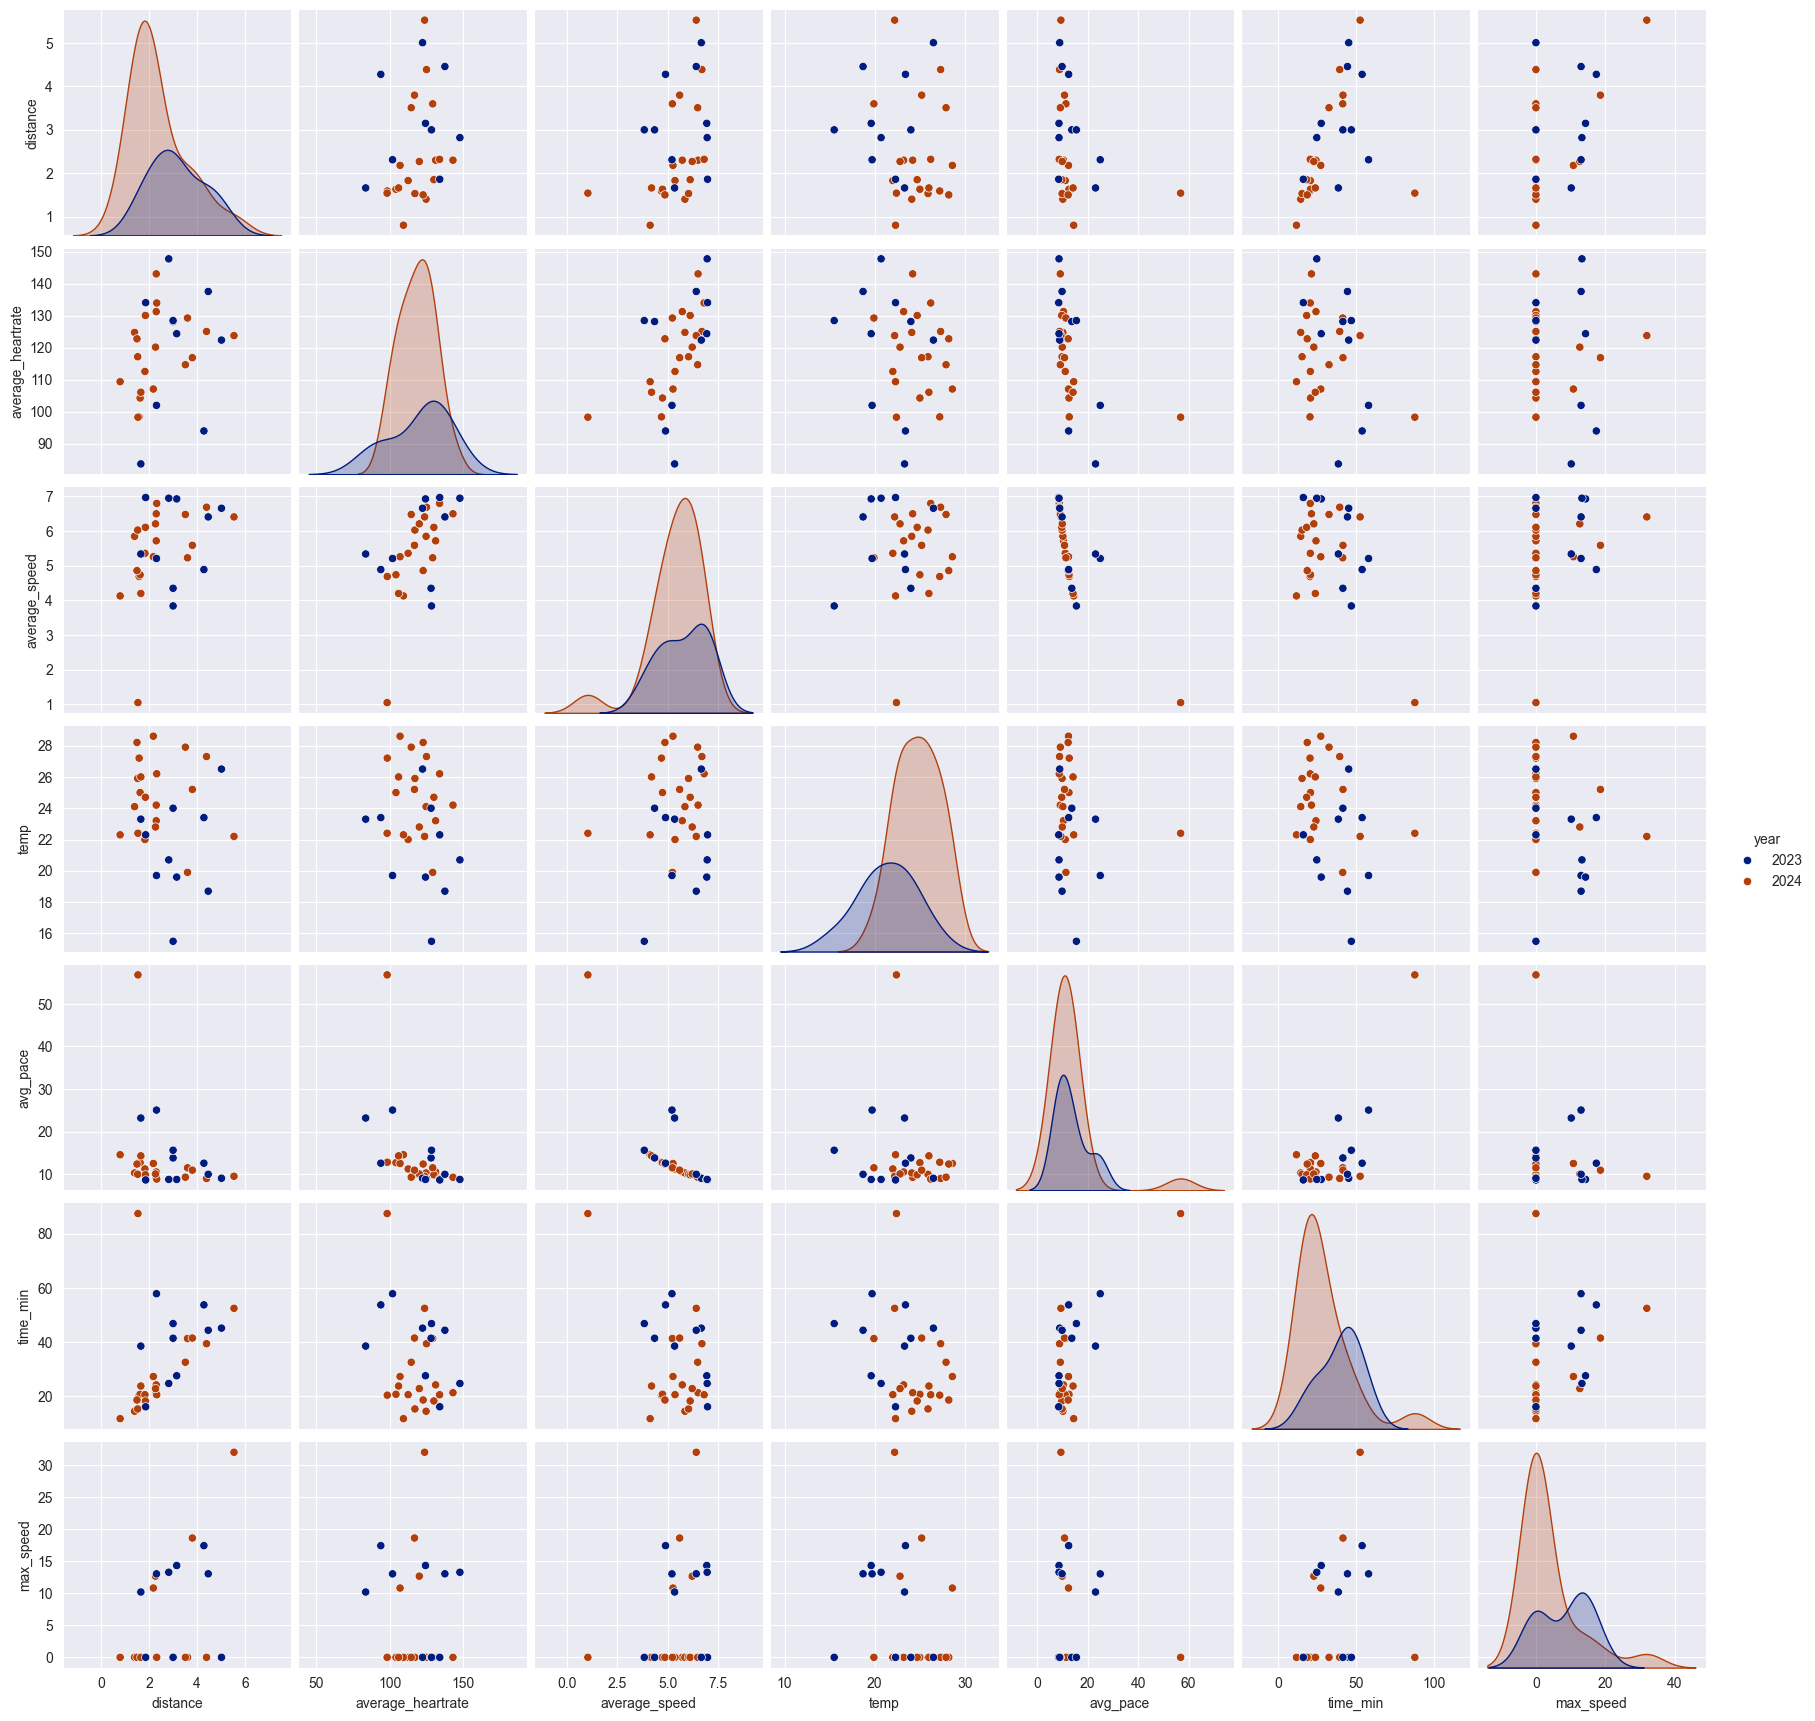

In [383]:
# criando uma visualização de pairplot, para verificar alguma correlação entre algumas variáveis
pp_df_run = df_run[['distance', 'average_heartrate', 'average_speed', 'temp', 'avg_pace', 'time_min', 'max_speed', 'year', 'start_time']]
sns.pairplot(pp_df_run, hue = 'year', palette='dark')

In [306]:
df_weight.columns
df_weight.describe()

,date,dayofyear,max_heartrate,average_heartrate,time_min,tempmax,tempmin,temp
count,68,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2024-01-03 01:45:52.941176576,115.794118,121.176471,93.860294,53.042794,27.488235,20.425000,23.623529
min,2023-06-14 00:00:00,3.000000,107.000000,82.200000,34.370000,16.100000,9.500000,14.900000
25%,2023-12-02 18:00:00,38.750000,116.000000,90.925000,46.222500,24.000000,19.000000,22.000000
50%,2024-01-31 12:00:00,65.500000,121.500000,94.000000,52.495000,27.900000,20.950000,24.200000
75%,2024-02-26 06:00:00,173.250000,126.000000,96.300000,57.952500,30.825000,22.700000,26.000000
max,2024-03-27 00:00:00,347.000000,136.000000,109.000000,79.450000,38.600000,24.800000,28.600000
std,NaN,111.359651,6.793195,5.078786,9.975235,4.408727,3.005983,3.265337


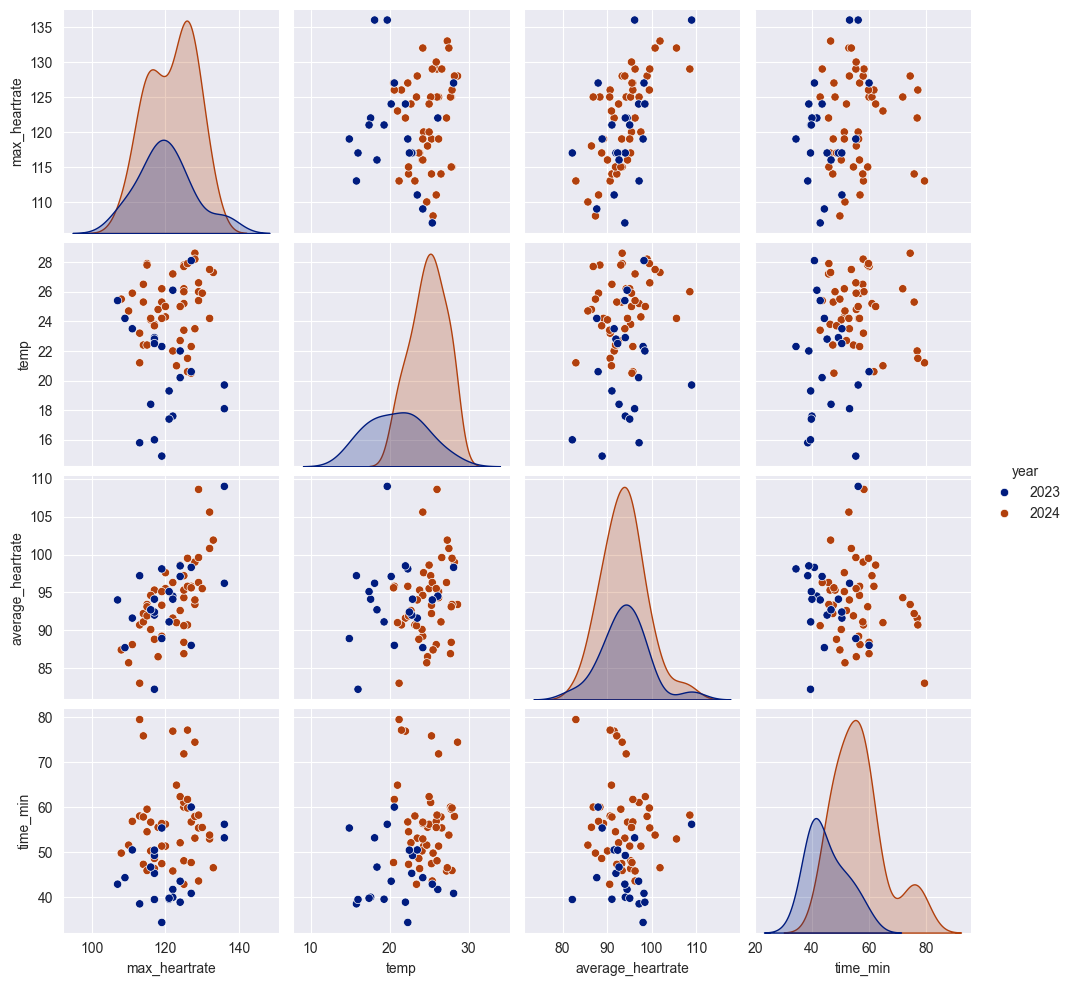

In [384]:
pp_df_weight = df_weight[['max_heartrate', 'temp', 'average_heartrate', 'time_min', 'year', 'start_time']]
sns.pairplot(pp_df_weight, hue='year', palette="dark")

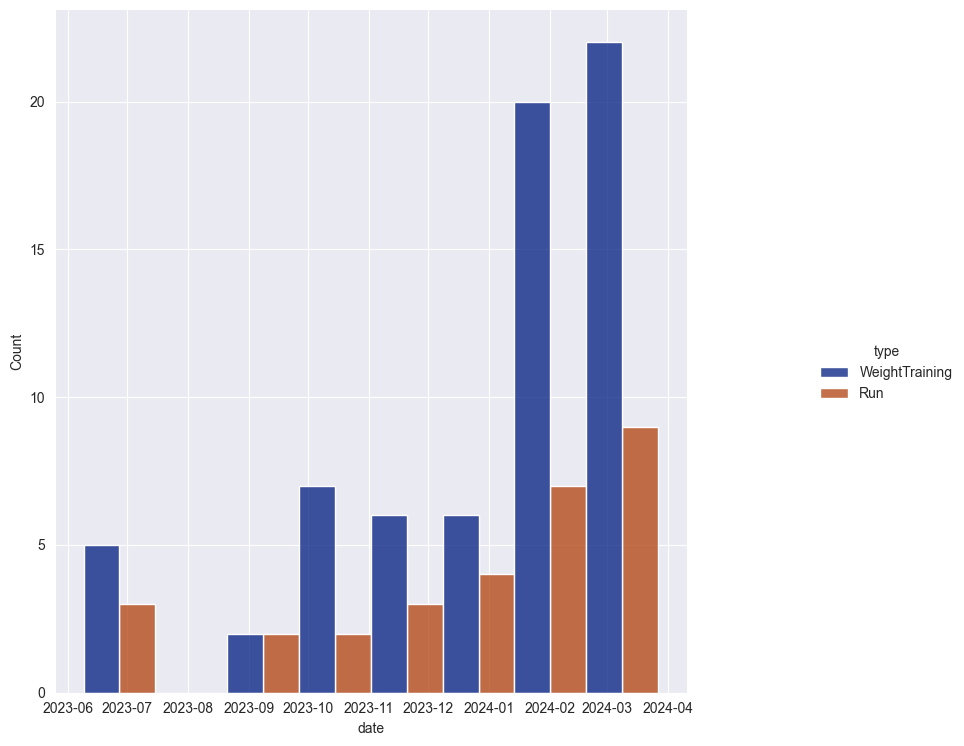

In [409]:
# verificando a distribuição de treinos ao longo do tempo
# podemos perceber que em 2023 eu não treinava com tanta frequencia e a partir de fevereiro de 2024 a coisa melhorou bastante
fig = sns.displot(df_strava_clima, x="date", hue="type", multiple="dodge", palette="dark")
fig.figure.set_size_inches(10, 8)

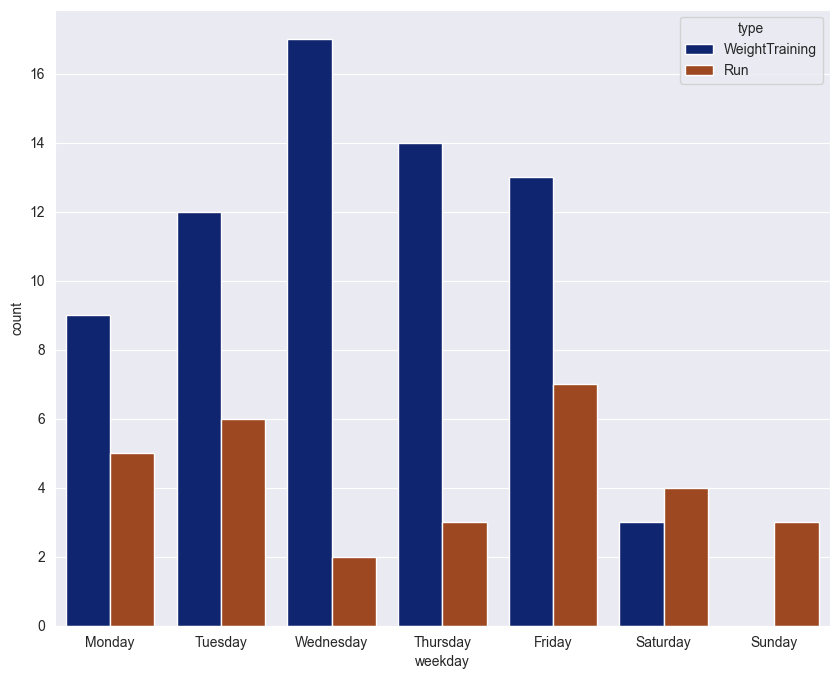

In [372]:
# verificando a quantidade de treinos por dia da semana

fig = sns.countplot(data=df_strava, x='weekday', hue='type',
                   order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday','Sunday'], palette="dark")
fig.figure.set_size_inches(10, 8)

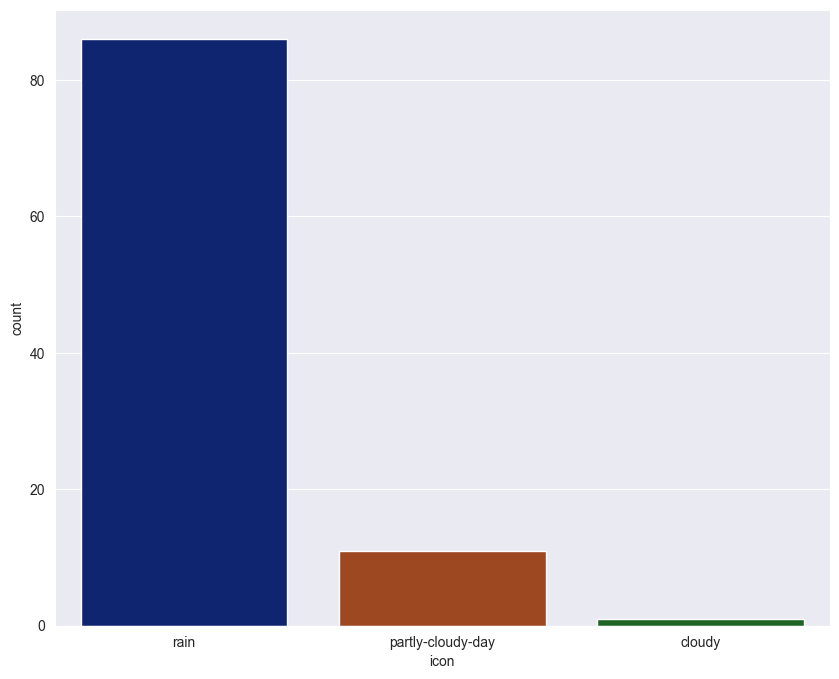

In [373]:
# verificando se a condição climática influencia em eu ir treinar
fig = sns.countplot(data=df_strava_clima, x='icon', palette="dark")
fig.figure.set_size_inches(10, 8)

In [330]:
import matplotlib.pyplot as plt

<Axes: >

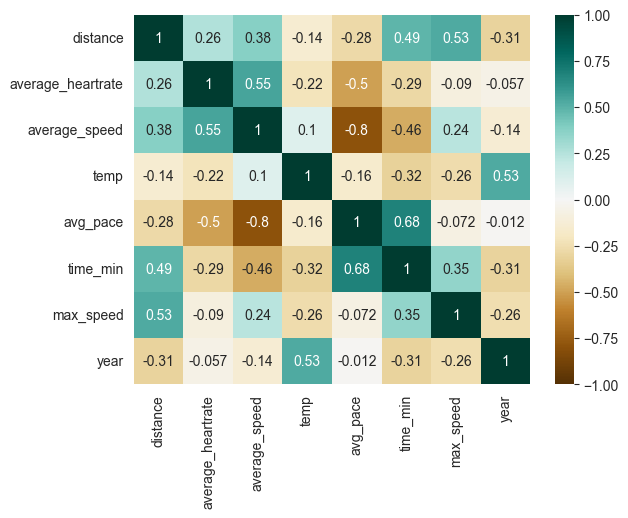

In [379]:
# criando um gráfico de heatmap (correlação) do df de corridas
sns.heatmap(pp_df_run.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")

<Axes: >

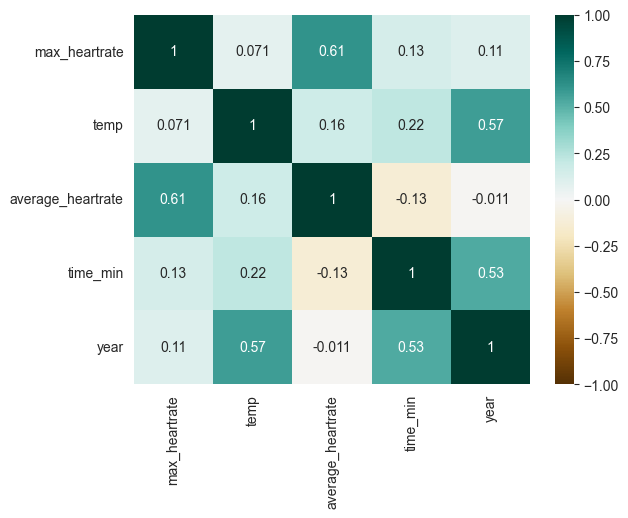

In [380]:
# criando um gráfico de heatmap (correlação) do df de musculação
sns.heatmap(pp_df_weight.corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")

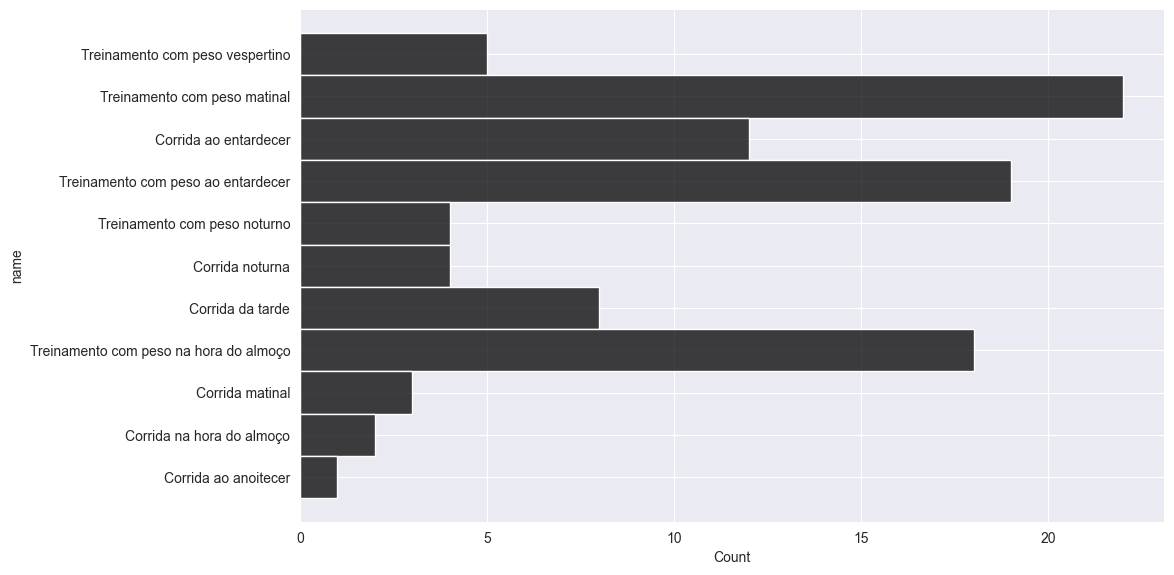

In [418]:
# identificando minhas prefencias de horário dos treinos, prefiro ir pela manhã, final da tarde ou na hora do almoço
fig = sns.displot(df_strava_clima, y='name', color='black')
fig.figure.set_size_inches(24, 6)